In [1]:
import os
os.chdir(os.environ['PROJECT_ROOT'])

%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rossmann.experiment import Experiment, compare_experiments
from rossmann.regressor import LightGBMRegressor, ProphetRegressor
from rossmann.transformer import LightGBMTransformer, ProphetTransformer
import time
import json
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [3]:
def RMSPE(col):
    return np.sqrt((col**2).sum() / len(col))

D:\anaconda\envs\Rossmann\lib\site-packages\IPython\core\interactiveshell.py:3364: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


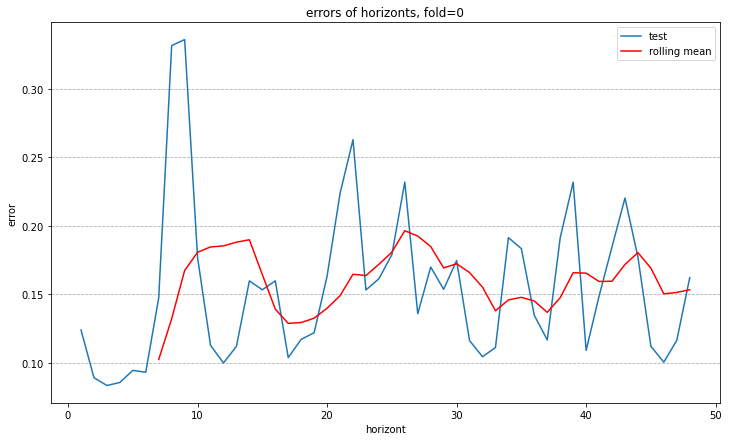

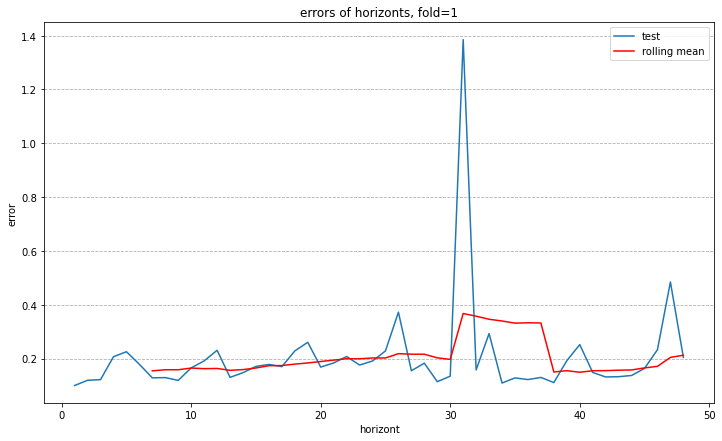

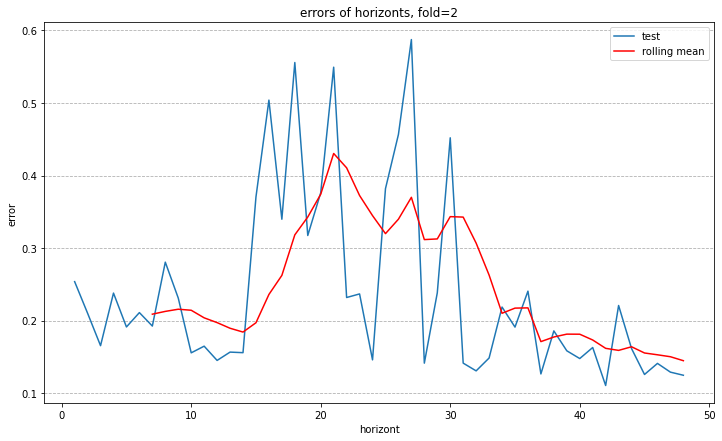

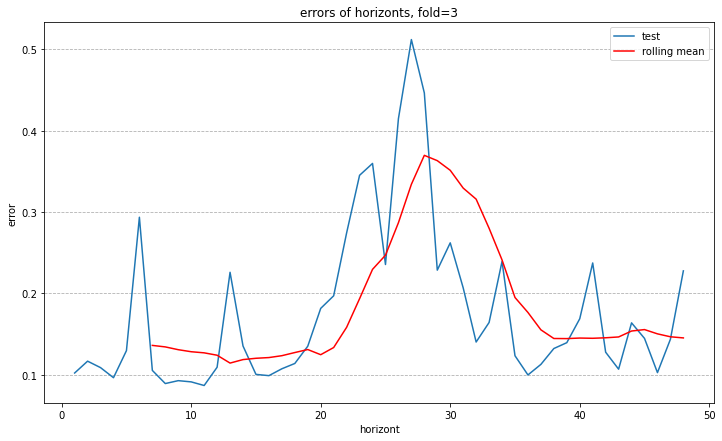

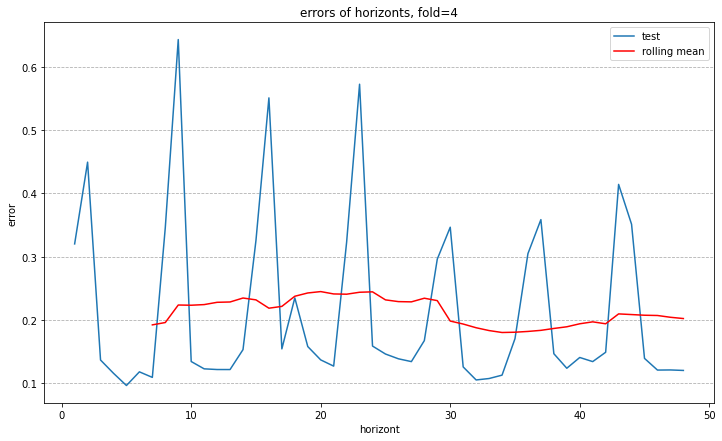

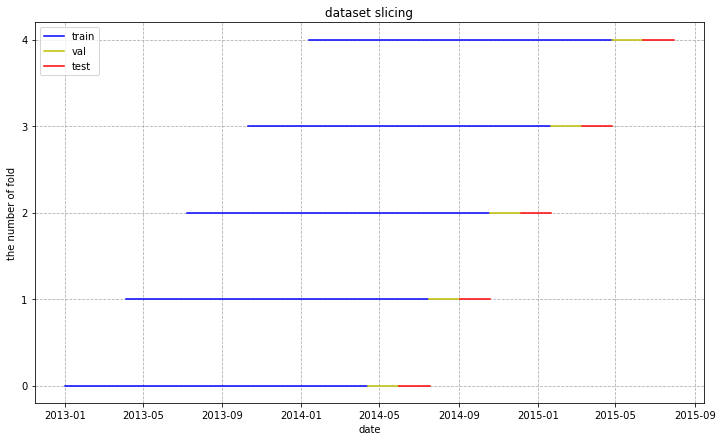

In [4]:
start = time.time()
lgbm_exp = Experiment(df_filename='data/raw/train.csv',
                      store_filename='data/raw/store.csv',
                      regressor=LightGBMRegressor(),
                      transformer=LightGBMTransformer(store_filename='data/processed/store.csv'))
lgbm_results = lgbm_exp.run(models_folder='models/lgbm/', mode='r')
lgbm_time = time.time() - start

In [5]:
print(f'lgbm evaluation time: {lgbm_time:.2f} s')

lgbm evaluation time: 774.20 s


D:\anaconda\envs\Rossmann\lib\site-packages\IPython\core\interactiveshell.py:3364: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


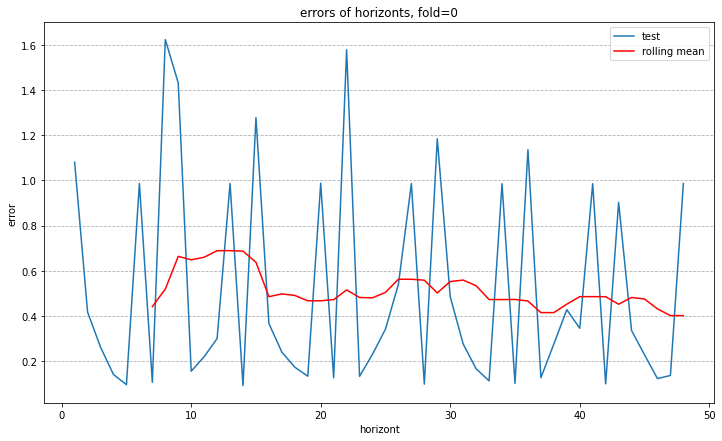

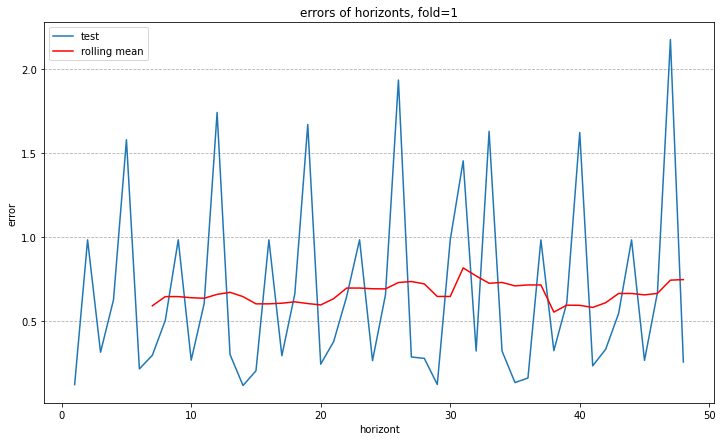

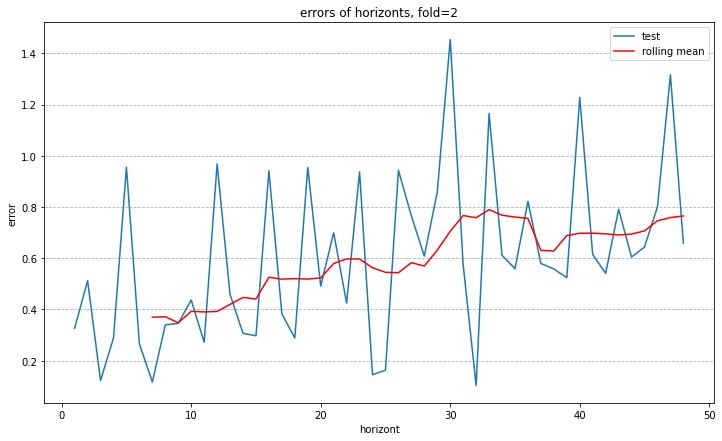

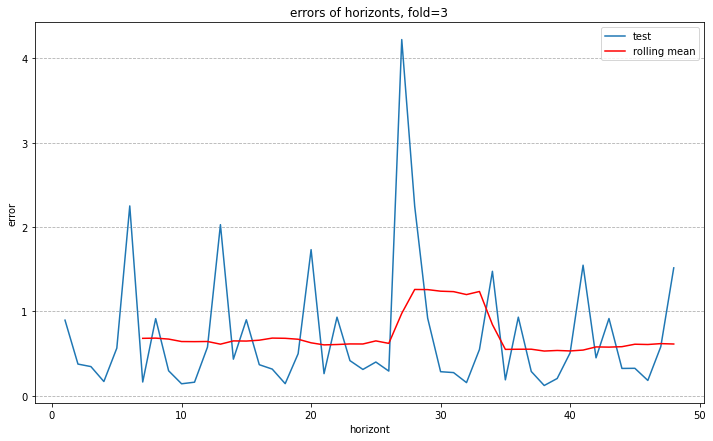

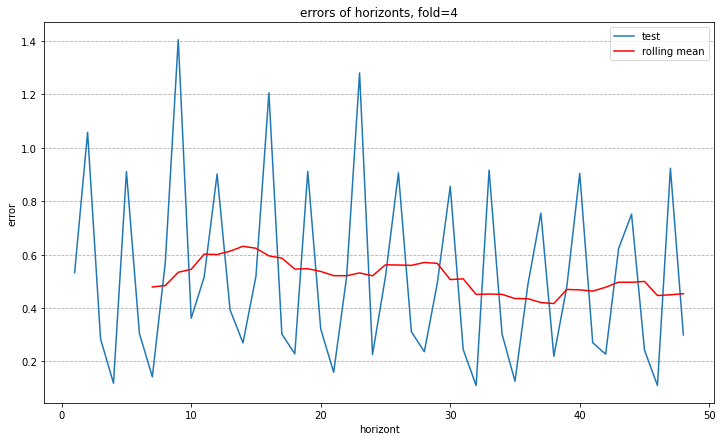

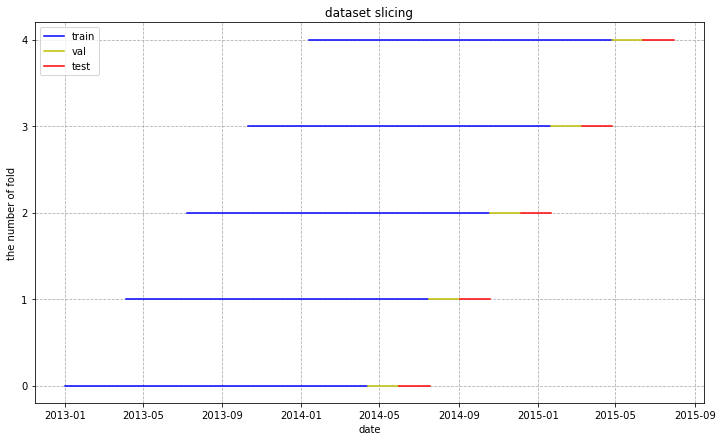

In [6]:
start = time.time()
prophet_exp = Experiment(df_filename='data/raw/train.csv',
                      store_filename='data/raw/store.csv',
                      regressor=ProphetRegressor(),
                      transformer=ProphetTransformer())
prophet_results = prophet_exp.run(models_folder='models/prophet/', mode='r')
prophet_time = time.time() - start

In [7]:
print(f'prophet evaluation time: {prophet_time:.2f} s')

prophet evaluation time: 923.12 s


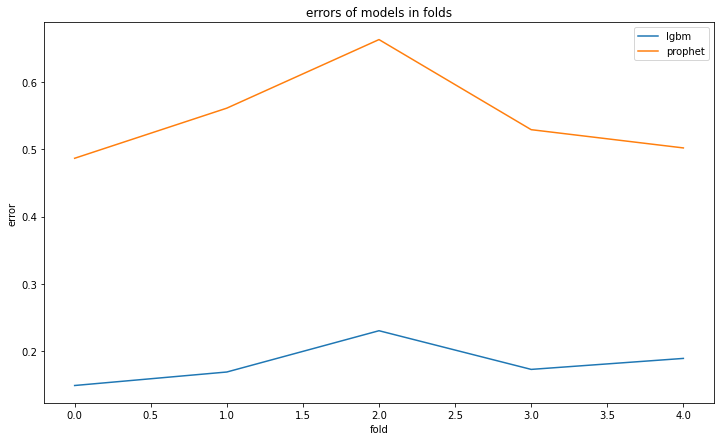

In [9]:
compare_experiments([lgbm_exp, prophet_exp], ['lgbm', 'prophet'])